# Page View Time Series Visualizer with Seaborn

<i> 
Pageviews: Google defines a pageview as “an instance of a page being loaded (or reloaded) in a browser”. <br> Every time someone starts a session by opening and viewing a page on your website (regardless of whether they're loading or reloading it) you get one pageview.<br> It  reflects how good is your page's SEO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import calendar

Let's have a look at the data

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date", parse_dates=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [3]:
quantile025 = df["value"].quantile(0.025)
df.drop(index= df[df["value"] < quantile025].index, inplace= True)

quantile975 = df["value"].quantile(0.975)
df.drop(index= df[df["value"] > quantile975].index, inplace= True)

##### Let's create a chart to see the pageview number overtime.

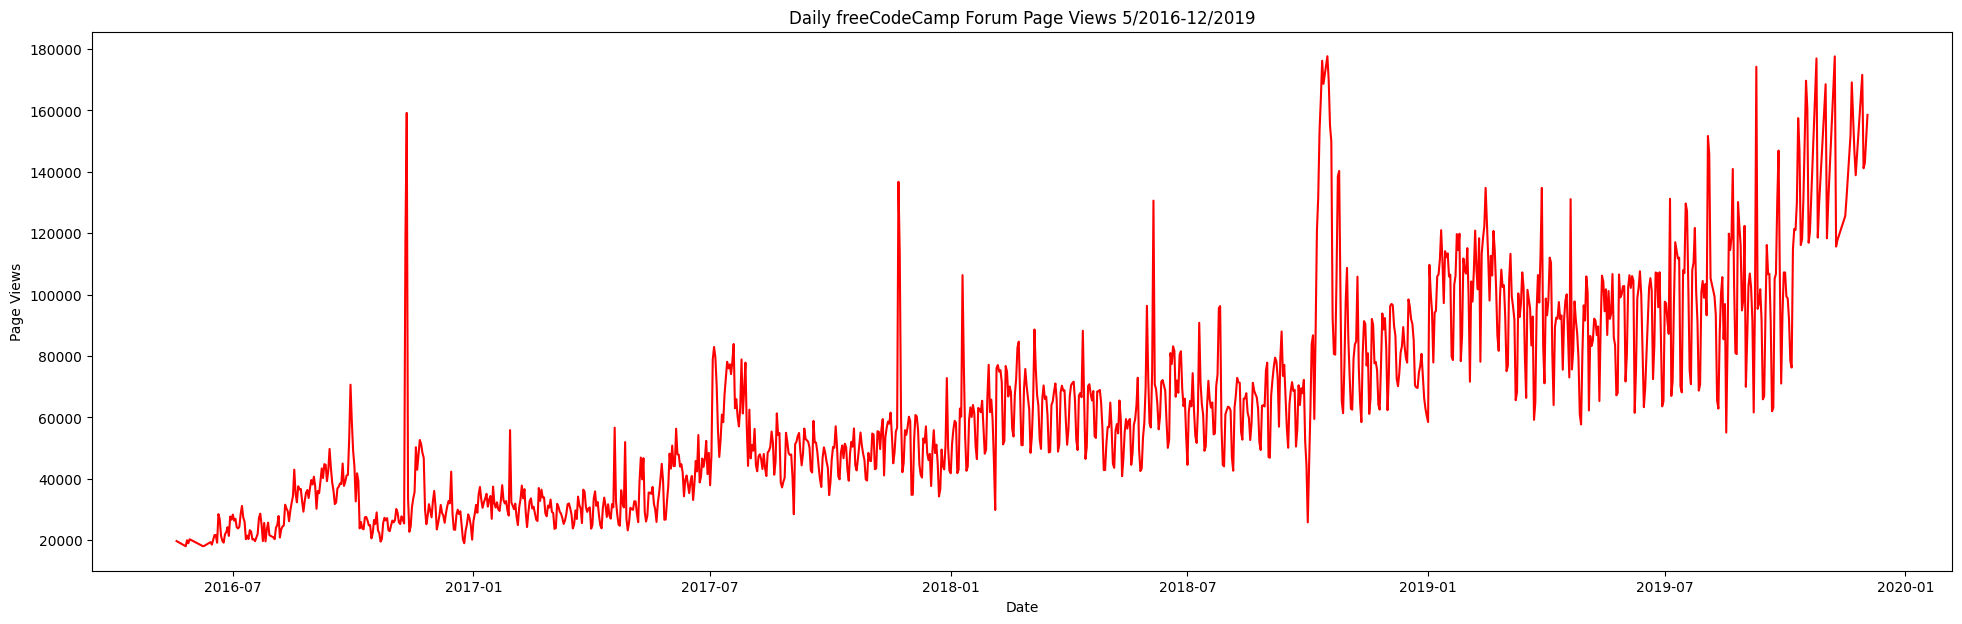

In [4]:
fig = plt.figure(figsize=(24,7))

plt.plot(df.index, df.values, color ="red")

plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")

plt.show()

fig.savefig('line_plot.png')

<i>As we can see, the pageview number gradually increases over time. Especially, in around December of every year, the pageview number upsurges dramatically.
It shows that people tend to visit sites when they have much freetime and  visit sites consecutively.

##### Let's create another chart shows average daily page views for each month grouped by year. 

Extract the Year and Month from the data entry.

In [6]:
df_bar = df.copy()
df_bar["month"] = df_bar.index.month 
df_bar["year"] = df_bar.index.year

Group data by year and month

In [7]:
df_bar_group = df_bar.groupby(["year","month"], as_index= False)["value"].mean()

Get list of month

In [10]:
month = [calendar.month_name[i] for i in range(1,13)]

Let's create the chart

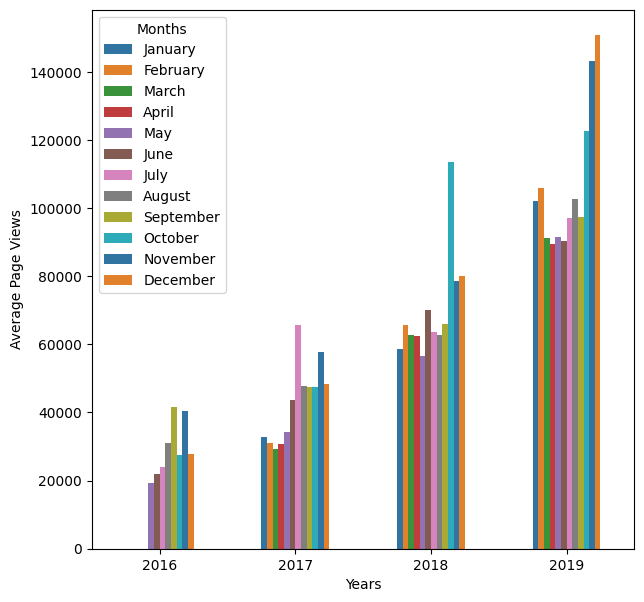

In [11]:
fig, ax = plt.subplots(figsize=(7,7))

ax = sns.barplot(data = df_bar_group, x = "year", hue="month" , y="value", palette="tab10", width=0.5)

#Get handle from the Figure and apply name to new name
handles, labels = ax.get_legend_handles_labels()
plt.legend( handles = handles, labels = month, title = "Months")

ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

plt.show()

<i> As you can see, the pageview gradually increases over time. <br> At the last three months of the year, the pageview number accumulation intensely than the other months.

##### Now, let's create a box plots that show how the values are distributed within a given year or month and how it compares over time.

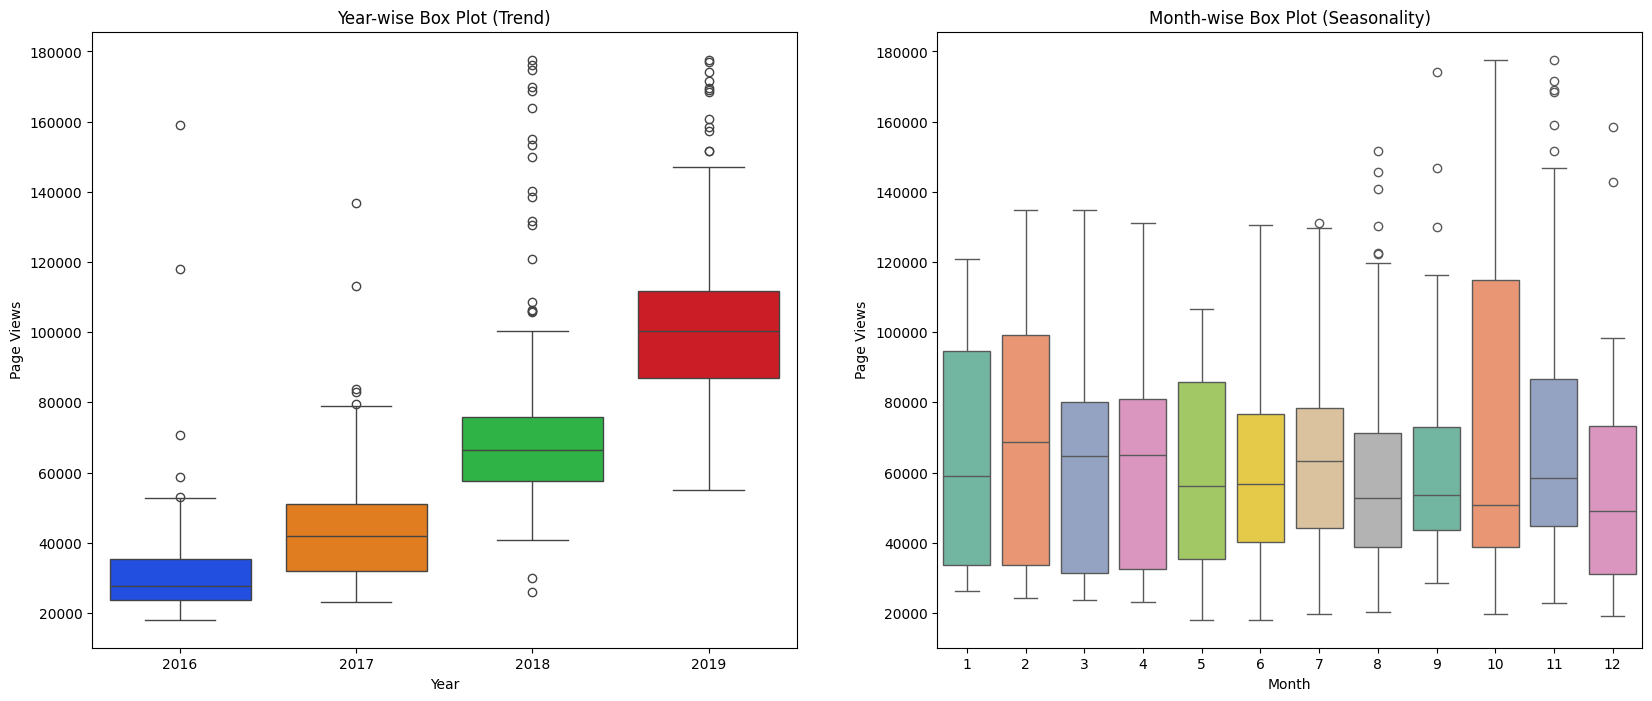

In [15]:
fig, ax = plt.subplots(1,2,figsize=(20,8))

sns.boxplot( data = df_bar, x= "year", y="value",hue = "year", ax = ax[0],legend= False, palette="bright")
ax[0].set_title("Year-wise Box Plot (Trend)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Page Views")

sns.boxplot( data = df_bar, x="month", y="value",hue = "month", ax=ax[1],legend= False, palette="Set2")
ax[1].set_title("Month-wise Box Plot (Seasonality)")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Page Views")

plt.show()

<i> In the plots:
- Pageviews by year show that the pageview number grew at fast rate. Every year, this number increases by around 50% 
- Pageview in the last three months of the year was very good. It also shows the habit of viewers.